<a href="https://colab.research.google.com/github/Ayden0nnn/DSCP-Final-Project/blob/main/Programming_Language_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW1

In [ ]:
import numpy as np
import pandas as pd
import csv
import matplotlib
import seaborn as sns

In [ ]:
from google.colab import files
data_cost = files.upload()
data_happiness = files.upload()

Saving cost_of_living.csv to cost_of_living.csv


Saving happiness.csv to happiness.csv


使用資料集:

1.國家快樂程度 2.國家所需生活費之程度


In [ ]:
import pandas as pd

# Load the happiness dataset
happiness_df = pd.read_csv('happiness.csv', delimiter='\t', header=None, names=['Countries', 'Happiness index, 2022', 'Global rank', 'Available data'])

# Load the cost of living dataset
cost_of_living_df = pd.read_csv('cost_of_living.csv', delimiter='\t', header=None, names=['Countries', 'Cost of living, 2017', 'Global rank', 'Available data'])

# Strip whitespace from the 'Countries' column
happiness_df['Countries'] = happiness_df['Countries'].str.strip()
cost_of_living_df['Countries'] = cost_of_living_df['Countries'].str.strip()

# Merge the two datasets on the 'Countries' column using outer join
merged_df = pd.merge(happiness_df, cost_of_living_df, on='Countries', how='outer')

# Output the merged DataFrame to a CSV file
merged_df.to_csv('merged_data.csv', index=False)

print('Merged data saved to "merged_data.csv".')


Merged data saved to "merged_data.csv".


inner join 兩個datasets

In [ ]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
happiness_df = pd.read_csv('happiness.csv')
cost_of_living_df = pd.read_csv('cost_of_living.csv')

# Merge the DataFrames based on the "Countries" column
merged_df = happiness_df.merge(cost_of_living_df, on='Countries', how='inner')

# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_data.csv', index=False)
# Display the merged DataFrame
print(merged_df)


     Countries  Happiness index, 2022  Global rank_x Available data_x  \
0      Albania                   5.28             81      2013 - 2022   
1      Algeria                   5.33             78      2013 - 2022   
2    Argentina                   6.02             50      2013 - 2022   
3      Armenia                   5.34             77      2013 - 2022   
4    Australia                   7.09             12      2013 - 2022   
..         ...                    ...            ...              ...   
122    Ukraine                   5.07             90      2013 - 2022   
123    Uruguay                   6.49             27      2013 - 2022   
124    Vietnam                   5.76             63      2013 - 2022   
125     Zambia                   3.98            125      2013 - 2022   
126   Zimbabwe                   3.20            131      2013 - 2022   

     Cost of living, 2017  Global rank_y Available data_y  
0                   60.79            109      2017 - 2017  
1  

In [ ]:
data = pd.read_csv('merged_data.csv')
data.head()

Countries  Happiness index, 2022  Global rank_x Available data_x  \
0    Albania                   5.28             81      2013 - 2022   
1    Algeria                   5.33             78      2013 - 2022   
2  Argentina                   6.02             50      2013 - 2022   
3    Armenia                   5.34             77      2013 - 2022   
4  Australia                   7.09             12      2013 - 2022   

   Cost of living, 2017  Global rank_y Available data_y  
0                 60.79            109      2017 - 2017  
1                 49.36            147      2017 - 2017  
2                 93.54             51      2017 - 2017  
3                 49.68            144      2017 - 2017  
4                168.02              7      2017 - 2017

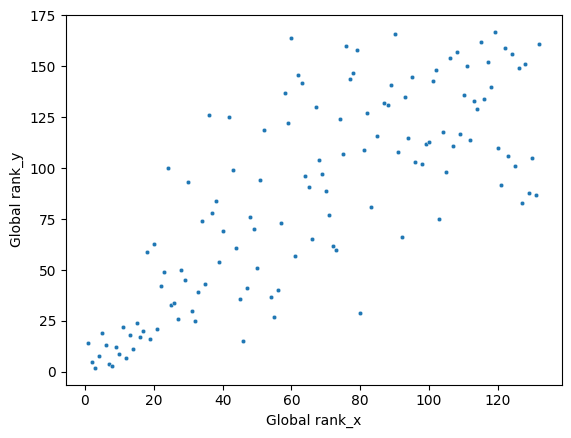

In [ ]:
import matplotlib.pyplot as plt
trace = sns.scatterplot(
    data = data,
    x = 'Global rank_x', #快樂排名(排名為快樂到不快樂)
    y = 'Global rank_y', #生活費排名(排名為所需生活費高到低)
    s = 10
    )
plt.show()

Q1.生活費佔支出的多寡跟快樂程度之關聯

可發現關聯，所需生活費越高之國家，快樂排名越名列前茅，推測為高所得、高生活品質之國家，人民生活越快樂。


In [ ]:
import pandas as pd

# Load the CSV files into Pandas DataFrames
happiness_df = pd.read_csv('happiness.csv')
cost_of_living_df = pd.read_csv('cost_of_living.csv')

# Merge the DataFrames based on the "Countries" column
merged_df = happiness_df.merge(cost_of_living_df, on='Countries', how='inner')

# Calculate the result and add it as a new column
merged_df['Happiness Index / Cost of Living'] = merged_df['Happiness index, 2022'] / merged_df['Cost of living, 2017']

# Sort the merged DataFrame by the "Happiness Index / Cost of Living" column
merged_df.sort_values(by='Happiness Index / Cost of Living', ascending=True, inplace=True)

# Specify the output CSV file name
output_file = 'merged_data_sorted_with_result.csv'

# Save the sorted DataFrame to the output CSV file
merged_df.to_csv(output_file, index=False)

print(f'Merged data sorted by "Happiness Index / Cost of Living" and saved to {output_file}')


Merged data sorted by "Happiness Index / Cost of Living" and saved to merged_data_sorted_with_result.csv


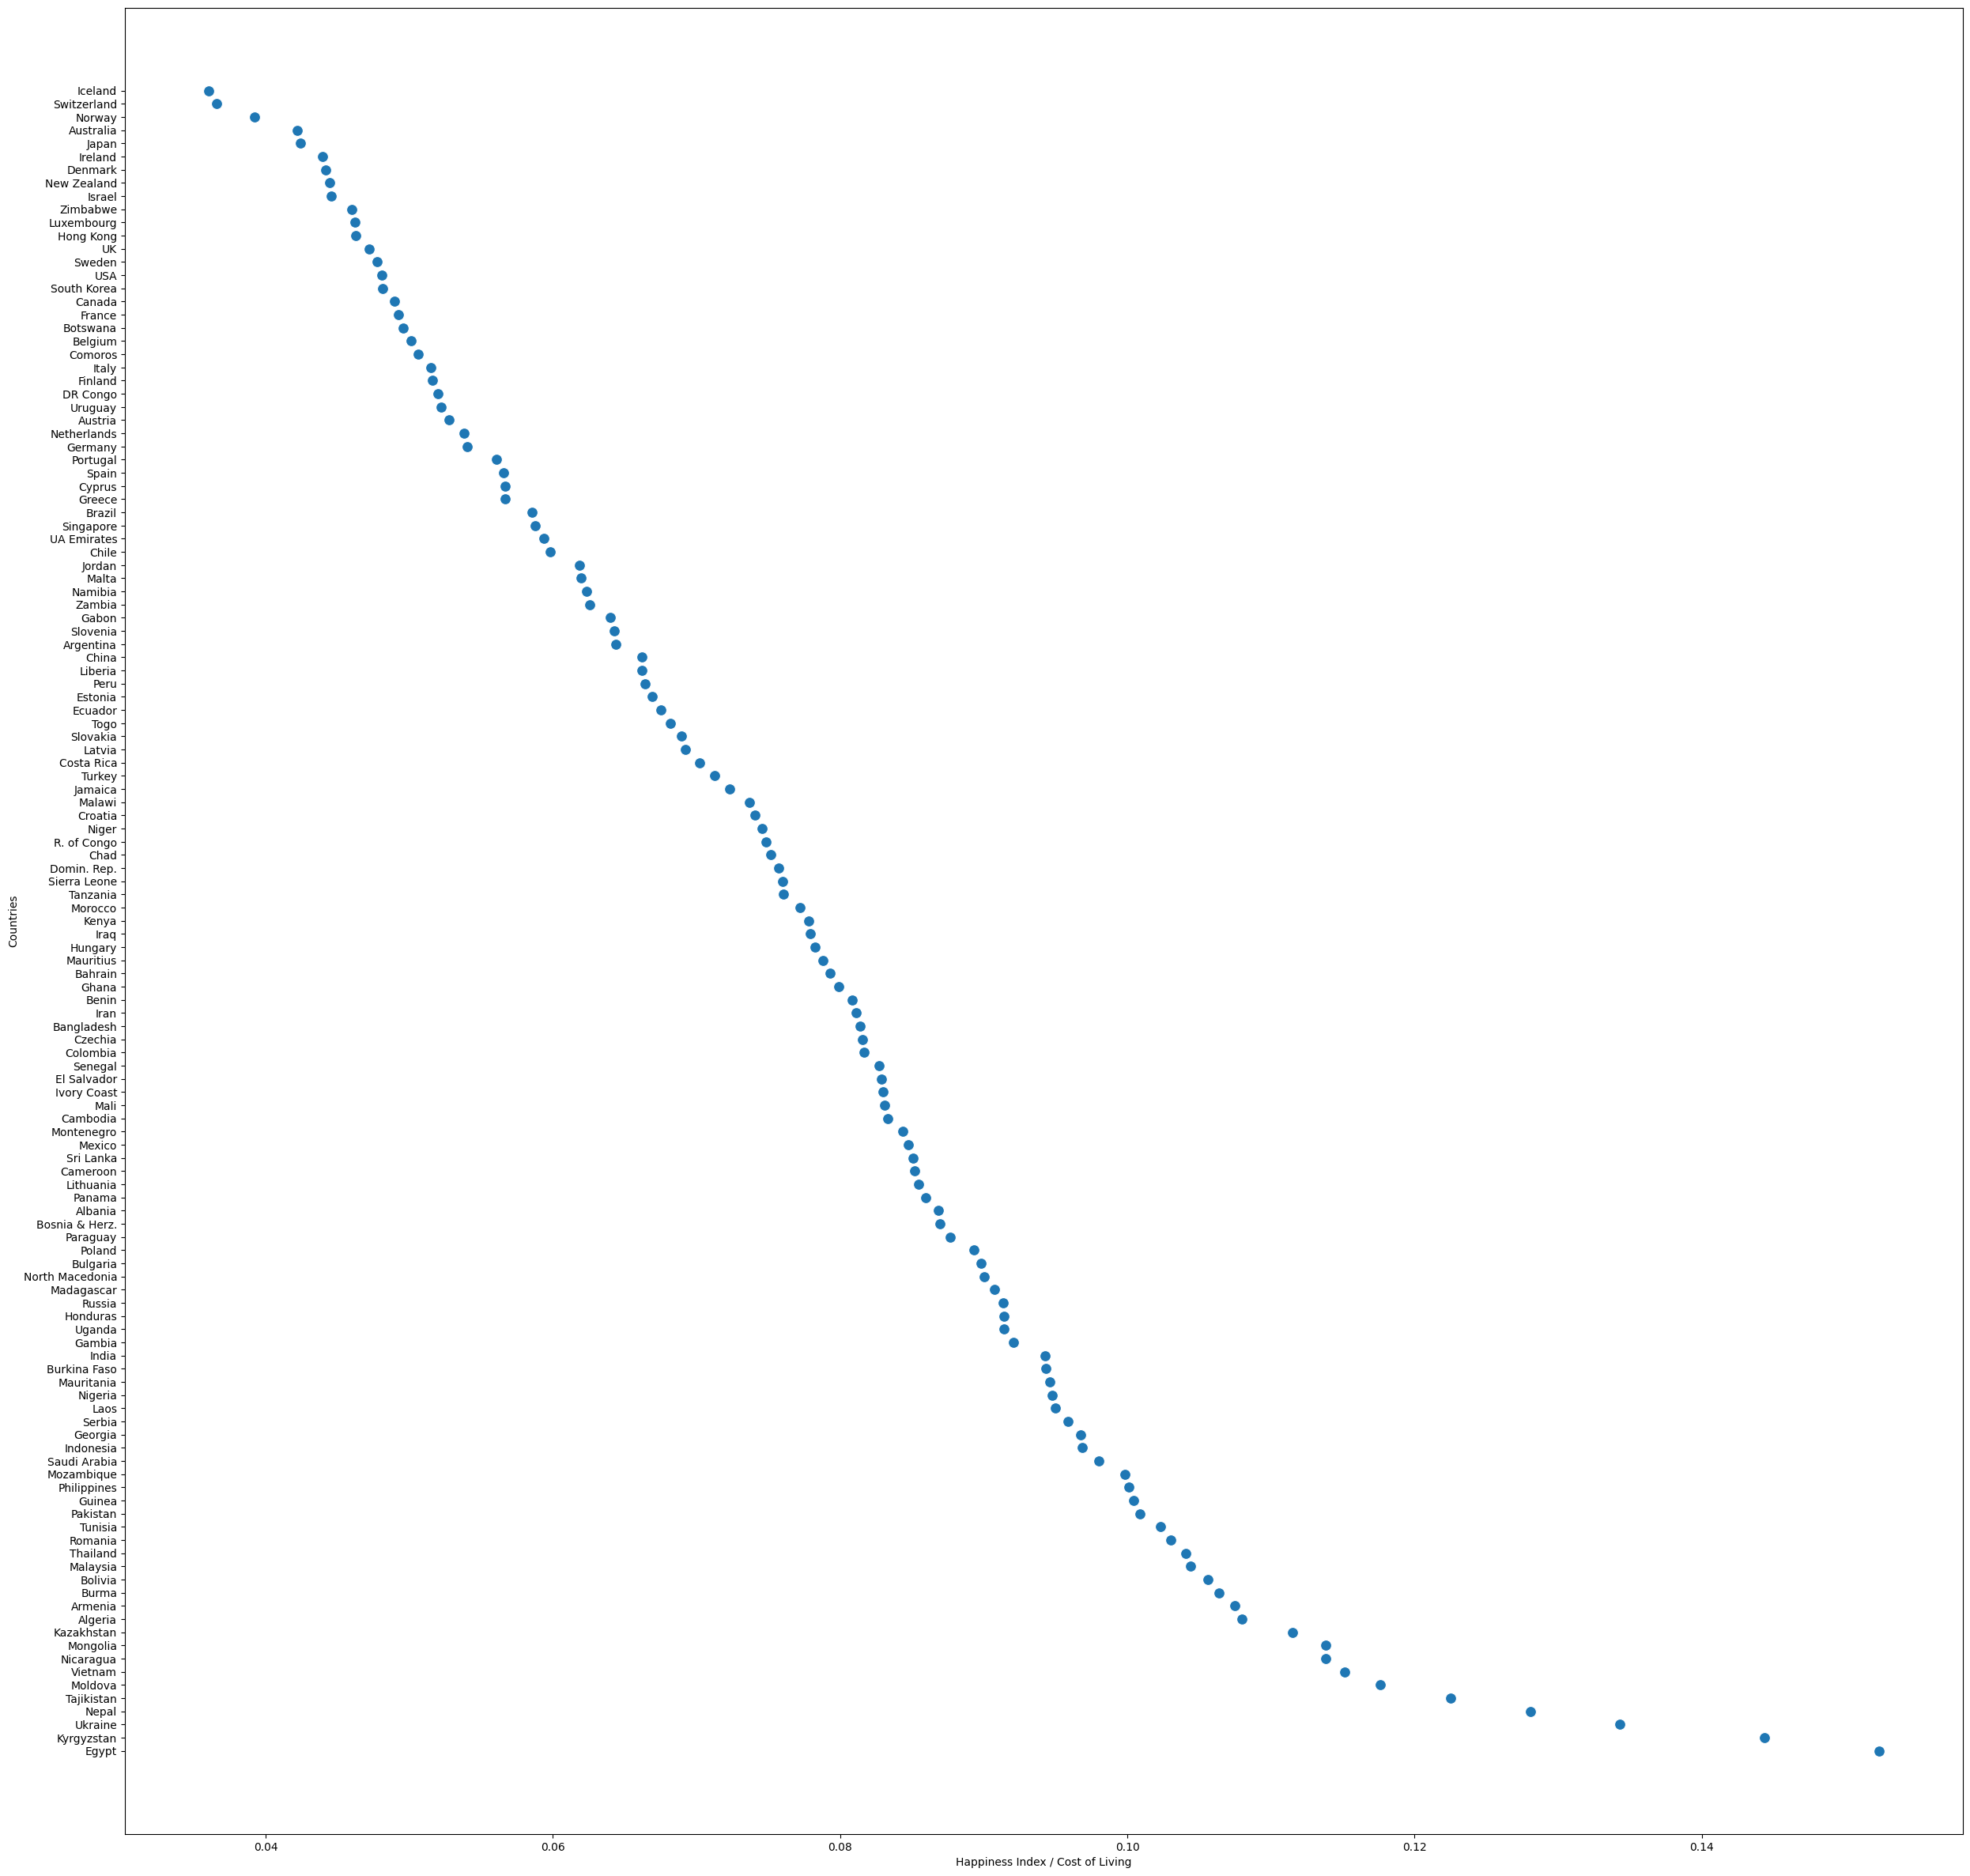

In [ ]:
plt.figure(figsize=(30, 30))
trace = sns.scatterplot(
    data = pd.read_csv('merged_data_sorted_with_result.csv'),
    x = 'Happiness Index / Cost of Living',
    y = 'Countries',
    s = 100
    )
plt.show()

Q2.快樂CP值問題

以快樂程度除以所需生活費程度，可以比較出在哪一個國家能在相對較低的生活成本下享受較高的生活品質，以及能比較不同國家或地區之間的幸福指數與生活成本的關係。

圖表中顯示y值越大之國家，快樂cp值越大，更能吸引人移入。

In [ ]:
import pandas as pd
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

# Read the CSV file into a DataFrame
df = pd.read_csv('merged_data_sorted_with_result.csv')

# Function to get the continent code for a given country name
def get_continent(country_name):
    try:
        country_alpha2 = country_name_to_country_alpha2(country_name)
        continent_code = country_alpha2_to_continent_code(country_alpha2)
        return continent_code
    except:
        return None

# Add a new "Continent" column to the DataFrame
df['Continent'] = df['Countries'].apply(get_continent)

# Save the updated DataFrame to a new CSV file
output_file = 'merged_data_with_continent.csv'
df.to_csv(output_file, index=False)

print(f'Updated data with continent information saved to {output_file}')


Updated data with continent information saved to merged_data_with_continent.csv


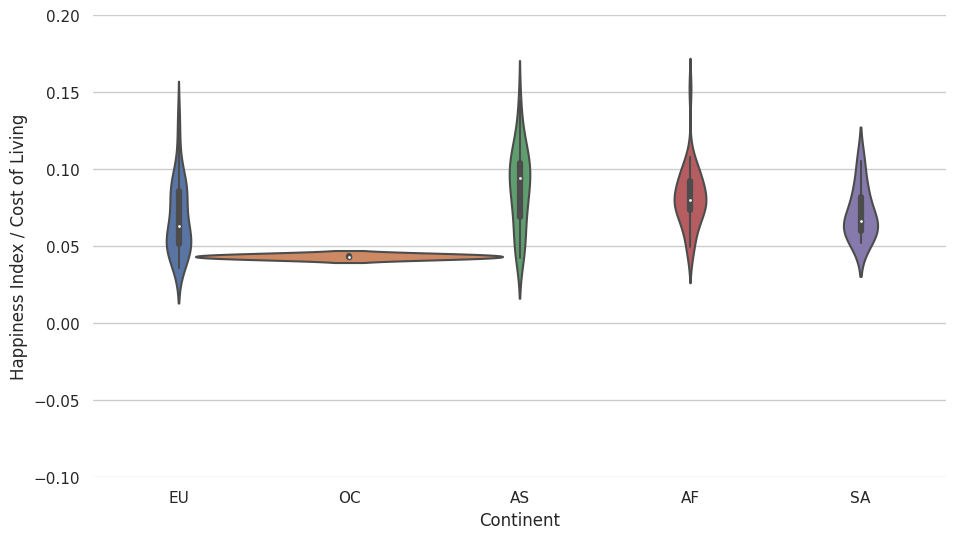

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset with continent information
df = pd.read_csv('merged_data_with_continent.csv')

# Set Seaborn theme and style
sns.set_theme(style="whitegrid")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violin plot with 'Continent' as the level
sns.violinplot(x='Continent', y='Happiness Index / Cost of Living', data=df, width=1.8)

# Finalize the figure
ax.set(ylim=(-.1, .2))
sns.despine(left=True, bottom=True)

# Show the plot
plt.show()


Q3.高cp值國家在五大洲之比例
y軸數值越低，代表快樂cp值越高，能發現在歐洲和大洋洲之快樂cp值較高，而我們身處的亞洲，反而之快樂cp值最差的地區，亞洲比起非洲和南美洲，收入並無較差，但因社會風氣及政策問題，人民反而過得不開心。
